# Dataset details:-
# Five Personality Traits

Big Five personality traits, also known as the five-factor model (FFM) and the OCEAN model, is for grouping different personality traits.

This theory uses descriptors of common language and suggests five broad dimensions commonly used to describe the human personality and psyche. The theory identifies five factors:

* Openness to experience (inventive/curious vs. consistent/cautious)
* Conscientiousness (efficient/organized vs. easy-going/careless)
* Extroversion (outgoing/energetic vs. solitary/reserved)
* Agreeableness (friendly/compassionate vs. challenging/detached)
* Neuroticism (sensitive/nervous vs. secure/confident)

![](https://drive.google.com/uc?id=1dbNj4UDAI9fRDpzo0t-RpvIOORStLZ4p)

This data set was collected (2016-2018) through an interactive on-line personality test. The personality test was constructed from the IPIP. 

The scale was labeled between 1=Disagree, 3=Neutral, 5=Agree.

You can find more info about each question in the data set link.

In this study I will analyse the data set and use unsupervised learning algorithm K-Means Clustering for clustering the participants.

Resources:
https://en.wikipedia.org/wiki/Big_Five_personality_traits
https://ipip.ori.org/newBigFive5broadKey.htm
https://www.kaggle.com/tunguz/big-five-personality-test

In [1]:
!git clone https://github.com/atharva-diwan/ME781_course_project_grp31.git

Cloning into 'ME781_course_project_grp31'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 68 (delta 30), reused 56 (delta 18), pack-reused 0
Unpacking objects: 100% (68/68), done.


In [2]:
cd ME781_course_project_grp31/

/content/ME781_course_project_grp31


In [3]:
!pip install -r requirements.txt

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

#Downloading big5 personality dataset

In [5]:
!gdown 'https://drive.google.com/uc?export=download&id=1EyZ8IBXhPrIkvLnjKaFVIAsAejbgTQHZ'

Downloading...
From: https://drive.google.com/uc?export=download&id=1EyZ8IBXhPrIkvLnjKaFVIAsAejbgTQHZ
To: /content/ME781_course_project_grp31/big_5_dataset.zip
100% 167M/167M [00:01<00:00, 155MB/s]


In [6]:
!unzip 'big_5_dataset.zip' -d big5_personality_dataset/

Archive:  big_5_dataset.zip
 extracting: big5_personality_dataset/IPIP-FFM-data-8Nov2018/.directory  
  inflating: big5_personality_dataset/IPIP-FFM-data-8Nov2018/codebook.txt  
  inflating: big5_personality_dataset/IPIP-FFM-data-8Nov2018/data-final.csv  
  inflating: big5_personality_dataset/IPIP-FFM-data-8Nov2018/sample_excel_file.xlsx  


## Loading the Data Set

In [7]:
data_raw = pd.read_csv('big5_personality_dataset/IPIP-FFM-data-8Nov2018/data-final.csv', sep='\t')
data = data_raw.copy()
pd.options.display.max_columns = 150

data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)

print('Number of participants: ', len(data))
data.head()

Number of participants:  1015341


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [8]:
print('Is there any missing value? ', data.isnull().values.any())
print('How many missing values? ', data.isnull().values.sum())
data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

Is there any missing value?  True
How many missing values?  89227
Number of participants after eliminating missing values:  1013481


## Understanding the Data Set

In [9]:
# Groups and Questions
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

# Group Names and Columns
EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]

In [10]:
# Defining a function to visualize the questions and answers distribution
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

Q&As Related to Extroversion Personality


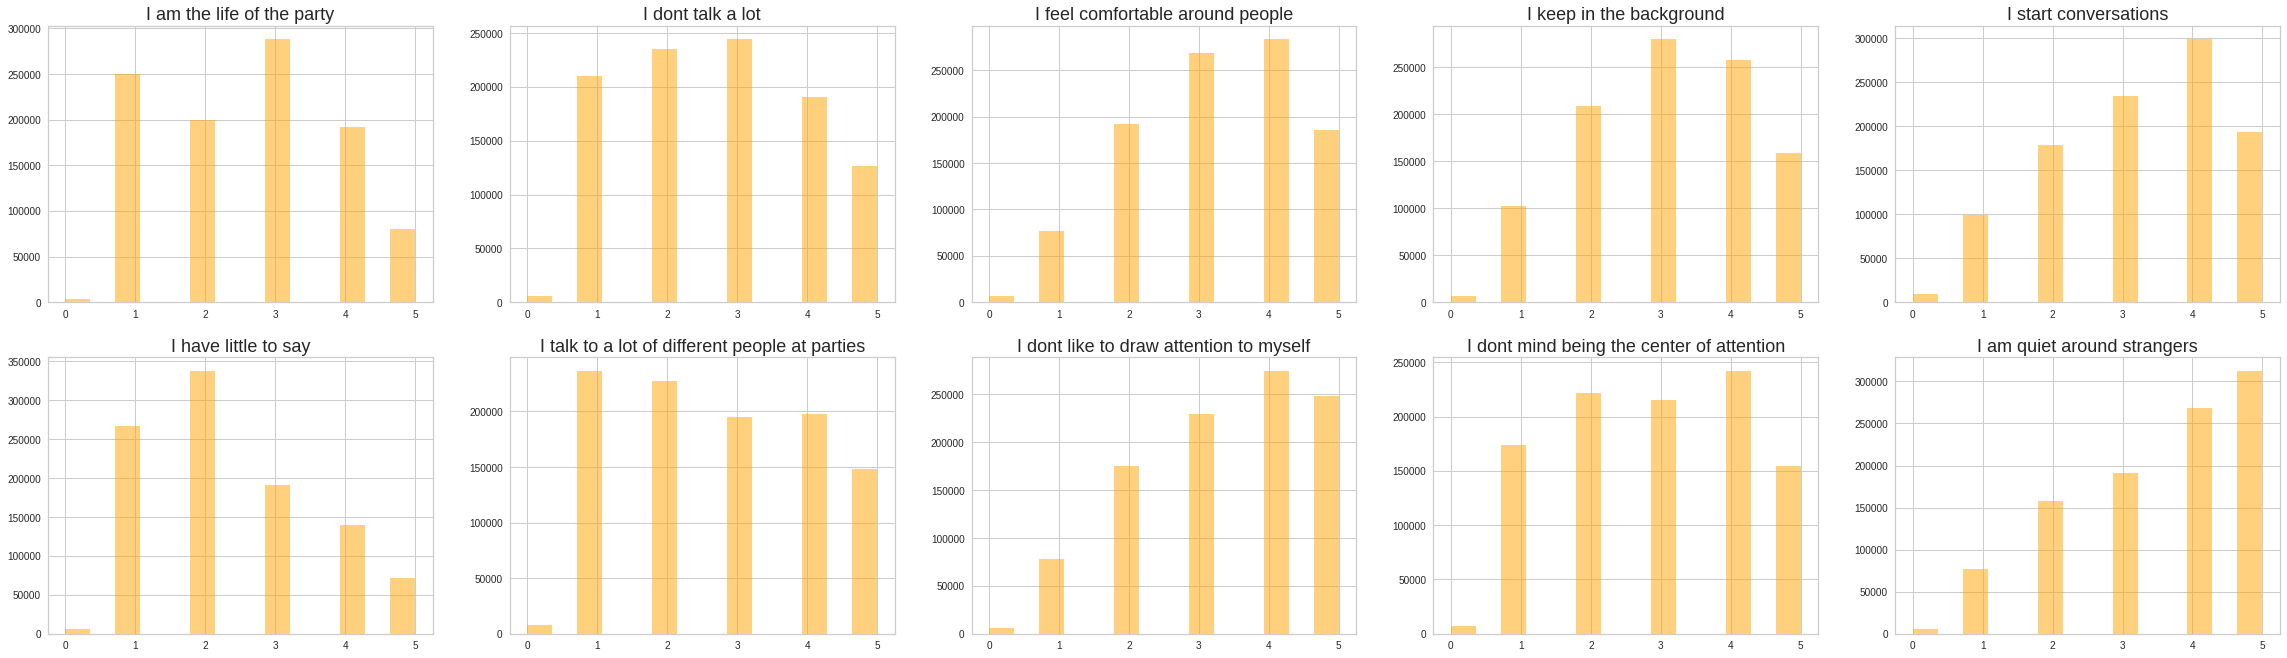

In [11]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, 'orange')

Q&As Related to Neuroticism Personality


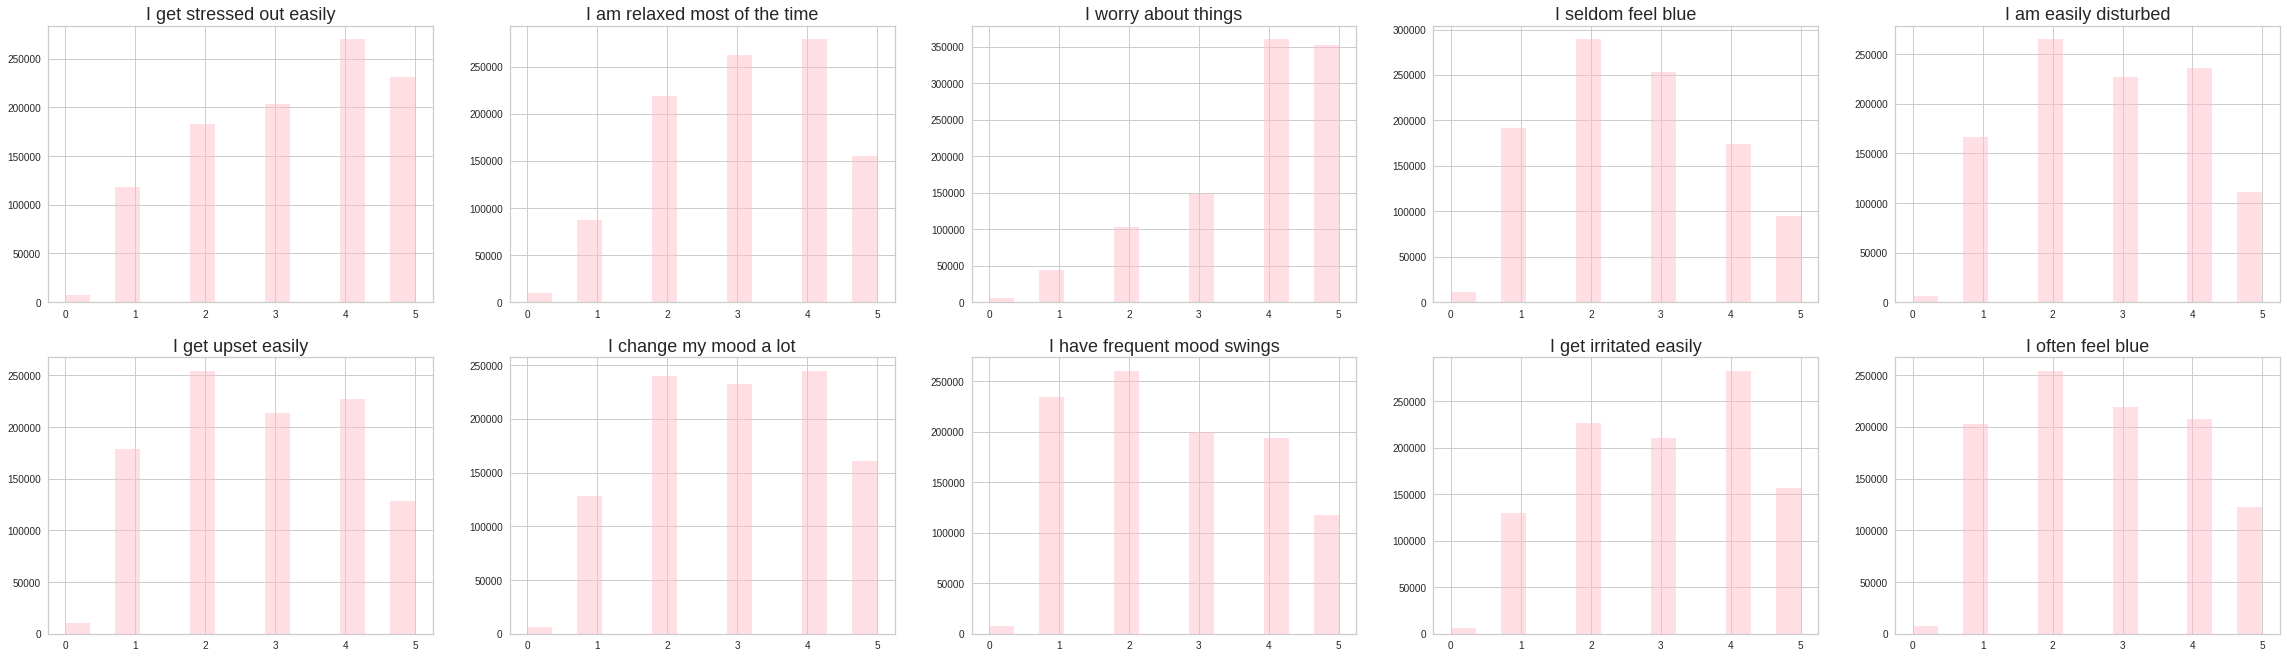

In [12]:
print('Q&As Related to Neuroticism Personality')
vis_questions(EST, est_questions, 'pink')

Q&As Related to Agreeable Personality


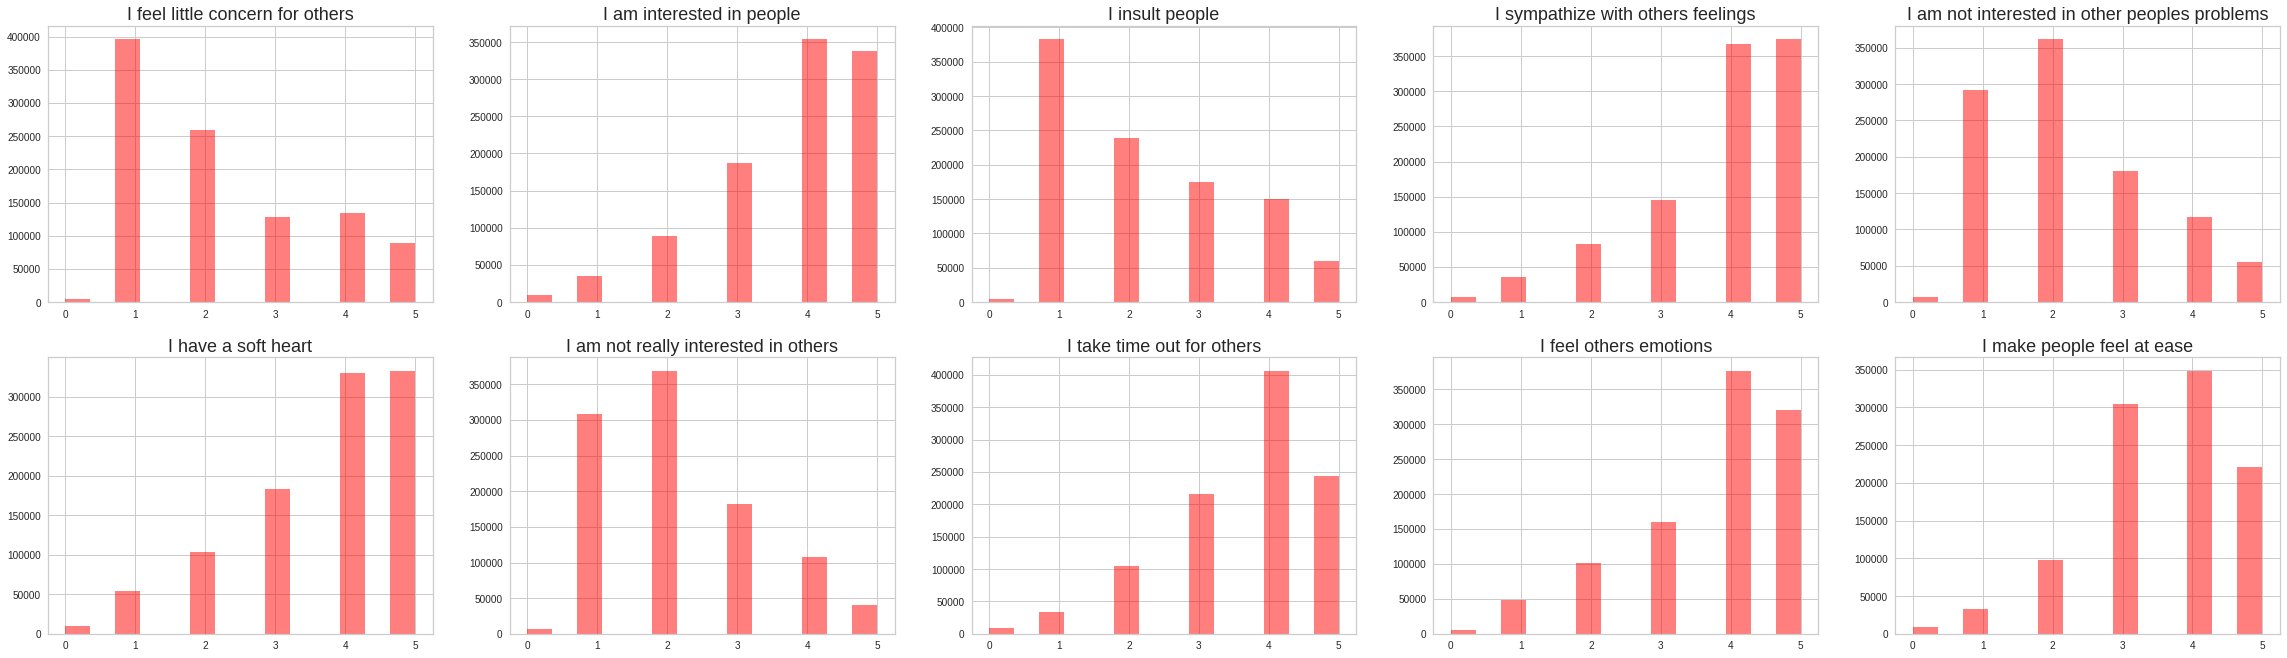

In [13]:
print('Q&As Related to Agreeable Personality')
vis_questions(AGR, agr_questions, 'red')

Q&As Related to Conscientious Personality


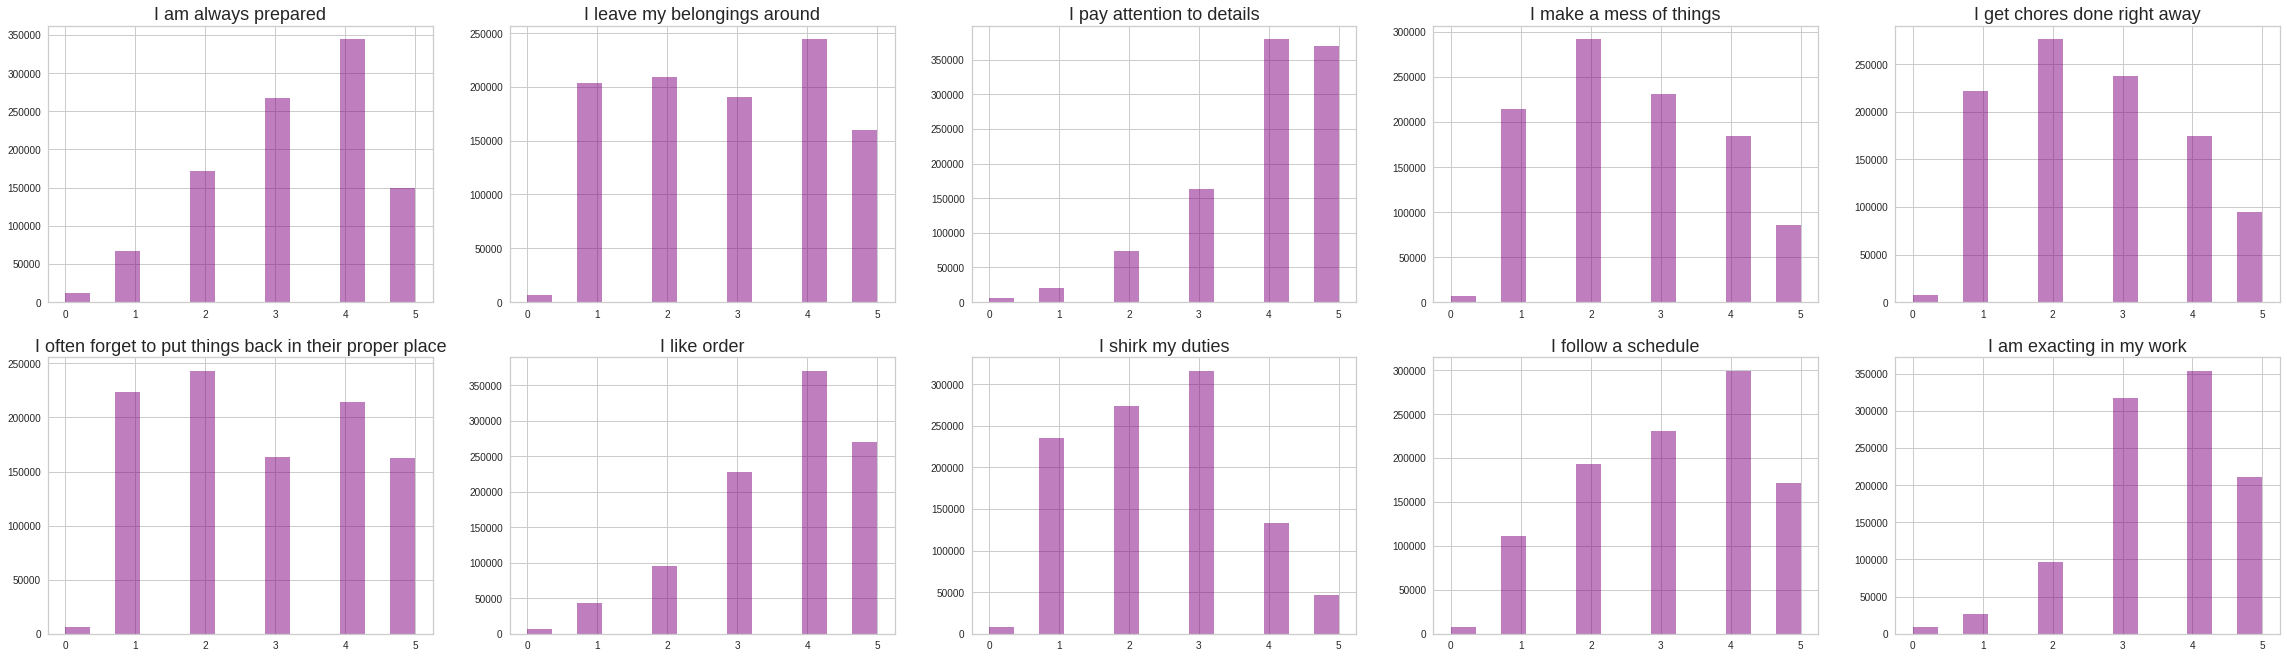

In [14]:
print('Q&As Related to Conscientious Personality')
vis_questions(CSN, csn_questions, 'purple')

Q&As Related to Open Personality


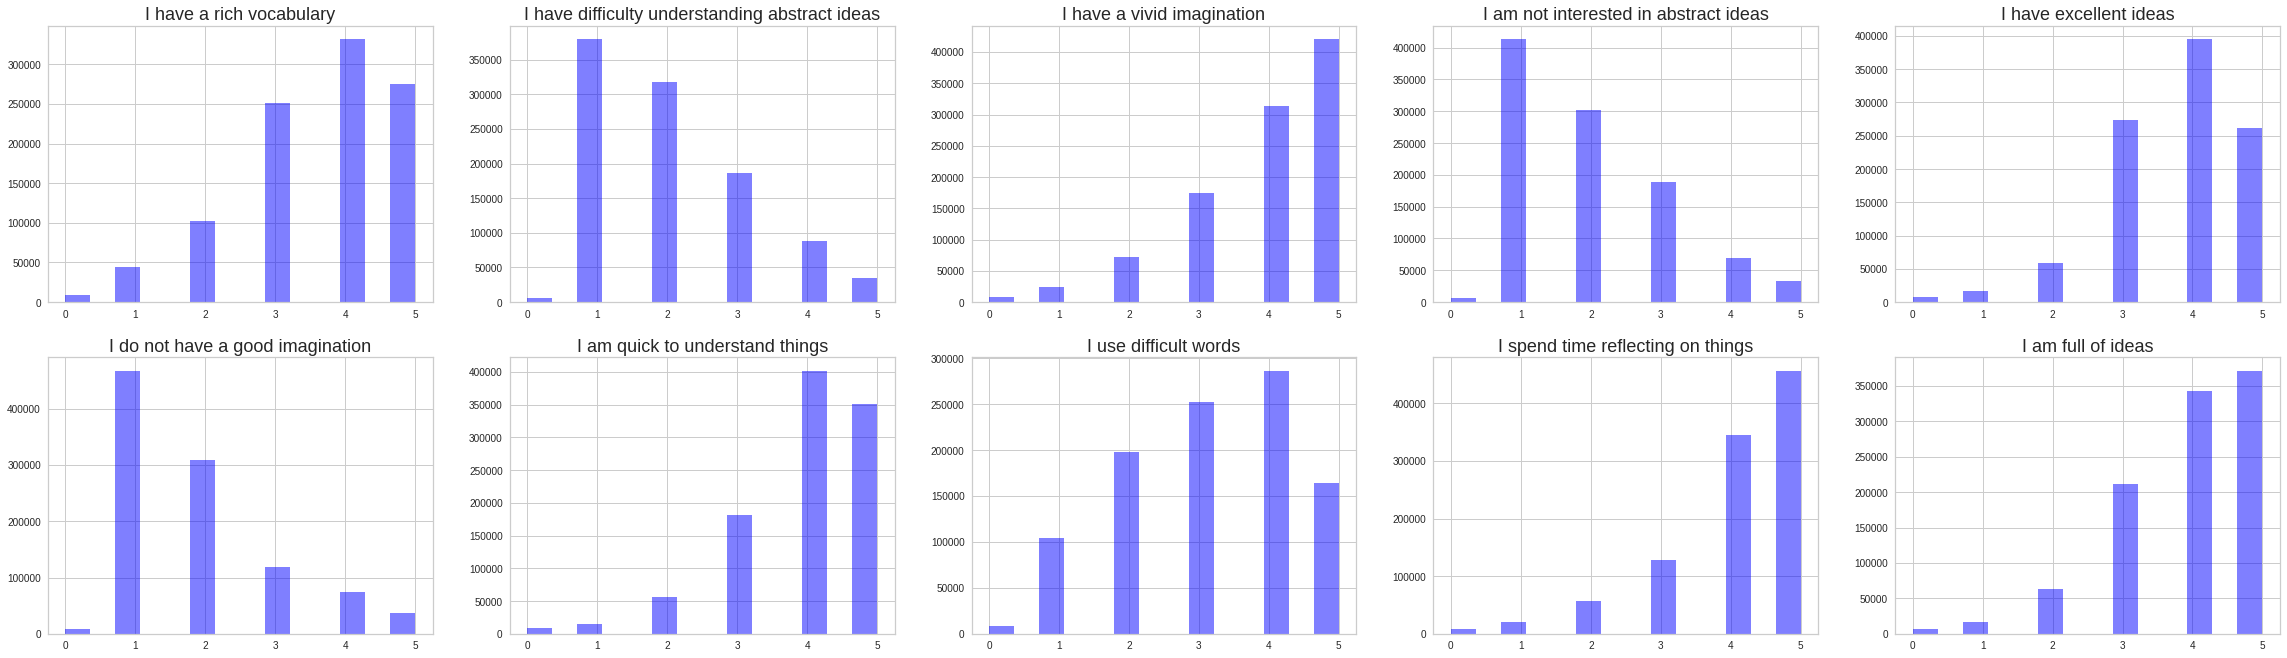

In [15]:
print('Q&As Related to Open Personality')
vis_questions(OPN, opn_questions, 'blue')

#scaling the data

In [16]:
df_model = data.drop('country', axis=1)
scaler = StandardScaler()                      #for scaling the data
df_model = scaler.fit_transform(df_model)

#PCA for dimensionality reduction

#cumulative variance plot for identifying no. of components

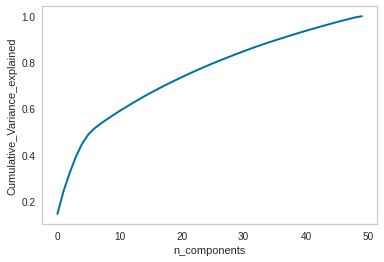

In [17]:


pca=PCA()  
pca.n_components=50


pca_data=pca.fit_transform(df_model)
percentage_var_explained = pca.explained_variance_ratio_;  
cum_var_explained=np.cumsum(percentage_var_explained)
#plot PCA spectrum   
plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(cum_var_explained,linewidth=2)  
plt.axis('tight')  
plt.grid()
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained') 
plt.show()

From the graph we can see that around 90% of variance is covered by 35 components

In [18]:
"""pca=PCA()  
pca.n_components=50
pca_data=pca.fit_transform(df_model) """ 
# look at explained variance of PCA components 
exp_var_cumsum=pd.Series(np.round(pca.explained_variance_ratio_.cumsum(),4)*100)  
for index,var in enumerate(exp_var_cumsum):  
    print('if n_components= %d,   variance=%f' %(index+1,np.round(var,3)))
   

if n_components= 1,   variance=14.390000
if n_components= 2,   variance=24.390000
if n_components= 3,   variance=32.330000
if n_components= 4,   variance=39.320000
if n_components= 5,   variance=44.880000
if n_components= 6,   variance=48.910000
if n_components= 7,   variance=51.530000
if n_components= 8,   variance=53.550000
if n_components= 9,   variance=55.420000
if n_components= 10,   variance=57.200000
if n_components= 11,   variance=58.950000
if n_components= 12,   variance=60.590000
if n_components= 13,   variance=62.230000
if n_components= 14,   variance=63.800000
if n_components= 15,   variance=65.350000
if n_components= 16,   variance=66.810000
if n_components= 17,   variance=68.250000
if n_components= 18,   variance=69.640000
if n_components= 19,   variance=71.000000
if n_components= 20,   variance=72.300000
if n_components= 21,   variance=73.600000
if n_components= 22,   variance=74.870000
if n_components= 23,   variance=76.070000
if n_components= 24,   variance=77.270000
i

From the table we can see that around 90% variance is covered by 36 components

# Applying PCA with no. of components as 36

In [19]:
no_of_components = 36
pca_train = PCA(n_components=no_of_components)                             # this instance of trained pca model should be used on test data
pca_fit = pca_train.fit_transform(df_model)
df_pca_fit = pd.DataFrame(pca_fit) #converting array to dataframe
df_pca_fit.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,-4.285807,-0.119114,1.935777,-1.500716,0.124459,0.494377,0.591791,-0.109642,-0.423354,0.635069,0.456116,-0.123894,-0.076387,1.108406,-0.522273,-0.224050,0.580954,-0.867396,-0.309786,-0.006719,-0.303638,-0.391250,-0.654035,0.000187,0.084789,0.441058,0.259370,-0.381723,-0.065052,0.447852,-0.237118,0.306069,0.283475,0.205127,-0.061325,-0.900008
1,0.436307,1.336256,-2.355988,2.113389,-2.369290,-0.226663,-1.521021,0.352893,-1.213509,0.169156,0.104550,-0.470394,-0.714106,-0.300201,-0.112723,0.257587,1.210378,-0.198244,0.669249,0.590510,-0.129851,1.004888,0.255076,0.037776,1.282032,0.078828,1.042397,0.422113,-1.546874,0.046061,0.542367,0.516699,0.178302,0.256898,1.149798,0.610704
2,-0.550437,1.329257,-1.163785,0.304452,-2.137356,1.151573,1.418109,0.477837,0.784070,-0.032000,-0.117867,-0.371252,0.472490,0.774605,-0.649902,-1.342098,1.656071,0.908236,-0.817065,0.823032,-0.528429,-0.924352,0.139120,0.178586,-0.331713,0.168530,-1.015930,0.523464,-0.165497,0.030171,-0.279737,0.785556,0.185004,0.136445,0.366129,0.095957
3,0.953149,0.196147,1.427499,-0.729395,-2.097478,0.414676,0.296840,-0.621607,-0.354238,-0.527475,0.350221,1.537549,-1.075465,-0.303999,1.002442,0.611097,-0.379203,-0.636163,0.928558,-1.388147,-0.545948,-0.243252,-0.021331,-0.056021,0.767771,0.208893,-0.483117,-0.192713,-0.035011,-0.576702,0.322259,-0.037995,-0.500421,0.680606,-0.271200,0.066596
4,-4.061477,0.934158,-4.297856,-0.945674,-0.943200,0.218224,-0.080780,-0.235186,-1.406696,-0.496475,-0.257785,0.220492,0.041941,0.070881,-0.325049,-0.200733,0.555579,-0.005548,0.176838,0.340065,0.437810,0.030889,-0.122405,-0.022259,0.036704,1.030751,0.845109,0.546255,0.025210,1.162954,-0.715005,0.465973,-0.617373,-0.165553,-0.470748,-0.764442


# K-Means Clustering

## How many clusters should we define?

In [20]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000 


df = data.drop('country', axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:5000]

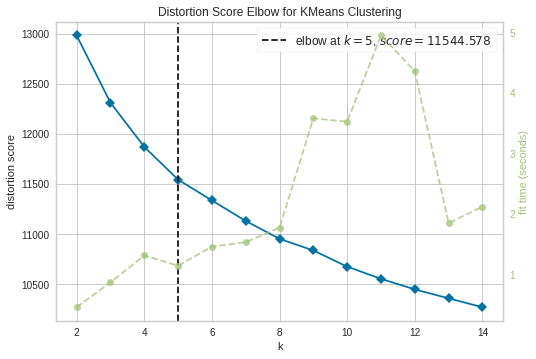

In [21]:
# Visualize the elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

The marginal sum of within-cluster distances between individuals & the marginal distance between the cluster centers is best at 5 clusters

## Clustering data into 5 Personality Groups

In [22]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

# defining 5 clusters and fitting the model

kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_pca_fit)                 # kmeans model fit on data with reduced dimensions

In [23]:
# Predicting the Clusters

pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_pca_fit['Clusters'] = predictions
df_pca_fit.head()

,0,1,2,3,4,...,32,33,34,35,Clusters
0,-4.285807,-0.119114,1.935777,-1.500716,0.124459,...,0.283475,0.205127,-0.061325,-0.900008,1
1,0.436307,1.336256,-2.355988,2.113389,-2.369290,...,0.178302,0.256898,1.149798,0.610704,3
2,-0.550437,1.329257,-1.163785,0.304452,-2.137356,...,0.185004,0.136445,0.366129,0.095957,1
3,0.953149,0.196147,1.427499,-0.729395,-2.097478,...,-0.500421,0.680606,-0.271200,0.066596,3
4,-4.061477,0.934158,-4.297856,-0.945674,-0.943200,...,-0.617373,-0.165553,-0.470748,-0.764442,1


## Analysing the Model and Predictions

How many individual do we have for each cluster?

In [24]:
df_pca_fit.Clusters.value_counts()

1    283829
3    278204
2    239102
4    207547
0      4799
Name: Clusters, dtype: int64

Let's group the results acording to clusters. That way we can investigate the average answer to the each question for each cluster.

That way we can have an intuition about how our model classifies people.

In [25]:
pd.options.display.max_columns = 150
df_pca_fit.groupby('Clusters').mean()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.354289,10.154794,7.134273,3.586184,-3.984739,9.442319,-0.876947,-0.676211,0.261129,0.265621,0.036259,0.792458,0.730110,-0.410833,0.185496,0.194389,-0.429600,-0.341441,0.166448,-0.444860,-0.270356,-0.006444,0.296015,0.141481,0.039624,-0.218613,0.563203,-0.120201,0.074167,-0.658339,-0.070788,0.145761,0.105894,0.543674,0.322011,0.152354
1,-2.804414,0.724505,-0.702210,0.284385,-0.132759,-0.060877,-0.006812,-0.006371,-0.009330,-0.033207,-0.000668,-0.016326,-0.030421,0.006776,0.013009,0.006184,-0.000802,0.019703,-0.006619,0.005608,0.003489,0.032075,-0.015115,-0.014066,0.004081,-0.000450,-0.008260,-0.006833,-0.005913,-0.002399,0.004810,-0.012249,-0.000251,-0.013993,-0.006561,0.002264
2,-0.848462,-1.966002,1.414498,-0.192048,0.222131,0.065551,0.023130,0.008789,-0.021185,0.031400,0.007155,0.003175,0.002892,-0.002310,-0.004726,-0.002335,0.021661,-0.016503,0.009392,0.014835,0.000311,-0.026410,0.002759,-0.017111,-0.006545,0.011609,0.007721,0.026137,-0.001274,0.010604,-0.014449,0.023785,0.015489,0.006445,0.016223,0.005641
3,2.427911,-0.923619,-0.828243,0.552556,-0.370307,0.087126,-0.021316,0.006801,0.036230,-0.026679,-0.035109,0.013618,0.051639,-0.016249,0.000554,0.006758,-0.026763,0.004362,-0.004927,-0.020081,0.001352,0.012042,-0.002944,0.006360,0.012877,-0.010936,0.013434,-0.017999,0.017655,-0.010552,0.015535,-0.017655,-0.025777,0.008273,-0.008023,-0.014399
4,1.526831,2.277370,0.275993,-0.991250,0.514162,-0.327382,0.031520,0.005108,-0.017437,0.038857,0.038893,-0.017910,-0.047830,0.024675,-0.017379,-0.019321,0.021950,-0.005884,0.000988,0.012445,-0.000691,-0.029431,0.014593,0.027153,-0.016218,0.006955,-0.028629,0.006139,-0.015827,0.020433,-0.009119,0.009645,0.014604,-0.011948,-0.006409,0.006183


## Visualizing the Cluster Predictions

In [26]:
# In order to visualize in 2D graph we will use PCA


pca_2d = PCA(n_components=2)
pca_fit = pca_2d.fit_transform(df_pca_fit)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


,PCA1,PCA2,Clusters
0,-4.466634,0.087017,1
1,0.569196,1.293861,3
2,-0.930231,1.244029,1
3,1.089555,0.174250,3
4,-4.243115,1.100932,1


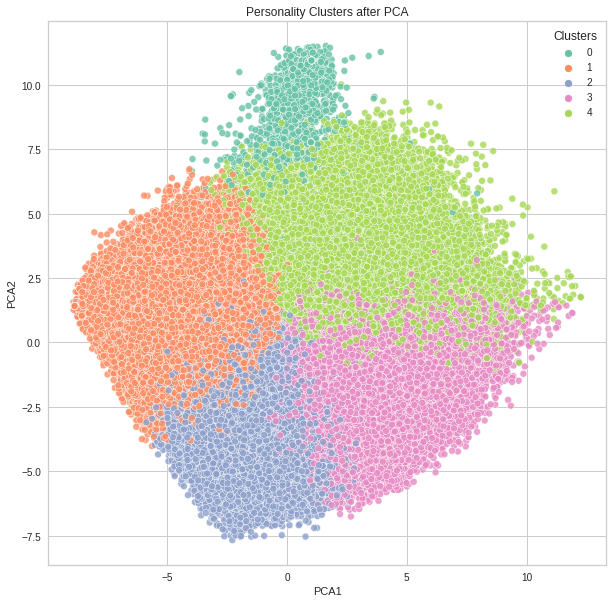

In [27]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

## Implementing the Model to check anyone's personality

answer the questions in an Microsoft Excel spread sheet. 
Then add that data into this notebook and put your answers to the model to see in which category you belong to.

A sample excel file is provided in the big5_dataset folder

In [28]:
my_data = pd.read_excel('big5_personality_dataset/IPIP-FFM-data-8Nov2018/sample_excel_file.xlsx')
my_data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,2,3,3,2,2,5,2,4,5,4,2,3,4,5,2,2,1,1,3,1,2,5,1,5,2,5,1,3,5,5,5,1,4,1,4,1,5,2,5,5,3,2,4,2,5,1,5,2,5,5


In [29]:
#my_data_array = np.array(my_data)

scaler = StandardScaler()                      
my_data1 = scaler.fit_transform(my_data)         # standard scaling of the data

#pca = PCA(n_components=no_of_components)       # NOTE: pca, which is the instance of PCA() should be the same which was trained above on the big5 personality dataset
my_data_pca_fit = pca_train.transform(my_data1) # transforming data to 36 principal components 

assert(my_data_pca_fit.shape == (1,no_of_components))

#predicting the cluster

In [30]:
my_personality = k_fit.predict(my_data_pca_fit)
print('My Personality Cluster: ', my_personality)

My Personality Cluster:  [2]


In [31]:
# Summing up the my question groups

col_list = list(my_data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

my_sums = pd.DataFrame()
my_sums['extroversion'] = my_data[ext].sum(axis=1)/10
my_sums['neurotic'] = my_data[est].sum(axis=1)/10
my_sums['agreeable'] = my_data[agr].sum(axis=1)/10
my_sums['conscientious'] = my_data[csn].sum(axis=1)/10
my_sums['open'] = my_data[opn].sum(axis=1)/10
my_sums['cluster'] = my_personality
print('Sum of the question groups')
my_sums

Sum of the question groups


,extroversion,neurotic,agreeable,conscientious,open,cluster
0,3.2,2.4,3.4,3.3,3.4,2


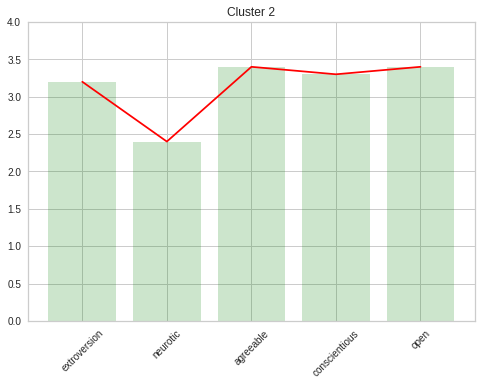

In [32]:
my_sum = my_sums.drop('cluster', axis=1)
plt.bar(my_sum.columns, my_sum.iloc[0,:], color='green', alpha=0.2)
plt.plot(my_sum.columns, my_sum.iloc[0,:], color='red')
plt.title('Cluster '+str(my_personality[0]))
plt.xticks(rotation=45)
plt.ylim(0,4);

#Finding the roommate/flatmate

In [33]:
def find_roommate(df_pca_fit, target_cluster, my_data_pca_fit):

  """
  Arguments:
  df_pca_fit = dataframe storing all the transformed data points (36 dimensions)
  target_cluster = cluster number of the test data point
  my_data_pca_fit = the transformed test data point

  Returns:
  array storing indices of closest 10 data points belonging to the target cluster
  """

  df_cluster = df_pca_fit.groupby('Clusters').get_group(target_cluster)   #selecting the data cooresponding to the desired cluster number
  #print(df_cluster.head())
  df_cluster = df_cluster.drop('Clusters', axis=1)
  df_cluster_array = np.array(df_cluster)

  data_point_list = list(np.array(df_pca_fit.drop('Clusters', axis=1)))   # list to store data points of all clusters

  point_list = []          # list to store all data points of target clusters 

  #print(df_cluster_array.shape)
  
  dist_list = []            # list to store euclidean distance of the target point form all other data points belonging to the same cluster


  for i in range(df_cluster_array.shape[0]):
    point1 = my_data_pca_fit
    point2 = df_cluster_array[i]
    point_list.append(point2)                      #storing data points belonging to the target cluster
    
    eucl_dist = np.linalg.norm(point1 - point2)   # euclidean distance b/w target point and other points in the target cluster
    
    dist_list.append(eucl_dist)
  

  min_idx = []                          # array to store indices of the 10 closest data points

  for d in sorted(dist_list)[:10]:          #selecting first 10 minimum distances

    temp_idx = dist_list.index(d)
    #print(point_list[temp_idx])
    #print(data_point_list[0])
    #point_idx = data_point_list.index(point_list[temp_idx])

    for k in range(len(data_point_list)):
      if list(point_list[temp_idx]) == list(data_point_list[k]):
        point_idx = k                                                  # storing the index of closest points w.r.t to the original dataframe (df_pca_fit)

    min_idx.append(point_idx)          


  return min_idx

In [34]:
idx_list = find_roommate(df_pca_fit, my_personality[0], my_data_pca_fit)

In [35]:
print(idx_list)  #these indices denote the position of 10 potential roommates in decreasing order 

[599920, 995652, 938050, 240775, 17674, 345719, 595733, 947798, 627615, 989070]


# Plotting the selected points and the target point on a scatter plot

In [36]:
df_pca.head()         # original dataframe consisitng data points that are transformed to 2-Dimensions 

,PCA1,PCA2,Clusters
0,-4.466634,0.087017,1
1,0.569196,1.293861,3
2,-0.930231,1.244029,1
3,1.089555,0.174250,3
4,-4.243115,1.100932,1


In [40]:
df_pca_array = np.array(df_pca)
sub_df_pca = pd.DataFrame(df_pca_array[idx_list , :])      # dataframe consisting of transformed selected points
sub_df_pca.columns = ['PCA1', 'PCA2', 'Clusters']    
print('dataframe consisting of transformed selected points ')
print(sub_df_pca)
sub_df_pca["Clusters"].replace({my_personality[0]: "selected points"}, inplace=True)     # the column values are being replaced from the predicted cluster value to 'selected points' to better visualize the scatter plot'


dataframe consisting of transformed selected points 
       PCA1      PCA2  Clusters
0 -0.360612 -0.320567       2.0
1  0.013824 -0.803677       2.0
2 -0.297320 -0.289370       2.0
3 -0.902741 -0.395002       2.0
4 -0.386800 -0.465185       2.0
5 -0.313990  0.043067       2.0
6 -0.322073 -0.164196       2.0
7 -0.083584 -0.418552       2.0
8 -0.856928 -0.534912       2.0
9 -0.691551 -0.200198       2.0


In [41]:

my_data_pca = np.append(my_data_pca_fit, [my_personality[0]]) #adding cluster number to the transformed test data point

my_data_pca = my_data_pca.reshape(1,-1)
#print(my_data_pca.shape)

my_data_2d = pca_2d.transform(my_data_pca)             # transforming target data point to 2 Dimensions 
#print(my_data_2d.shape)
target_df = pd.DataFrame({"PCA1":[my_data_2d[0,0]], "PCA2":[my_data_2d[0,1]], "Clusters":['target point'] })


sub_df_pca = sub_df_pca.append(target_df)
print('dataframe with selected and target points')
sub_df_pca

dataframe with selected and target points


,PCA1,PCA2,Clusters
0,-0.360612,-0.320567,selected points
1,0.013824,-0.803677,selected points
2,-0.297320,-0.289370,selected points
3,-0.902741,-0.395002,selected points
4,-0.386800,-0.465185,selected points
5,-0.313990,0.043067,selected points
6,-0.322073,-0.164196,selected points
7,-0.083584,-0.418552,selected points
8,-0.856928,-0.534912,selected points
9,-0.691551,-0.200198,selected points


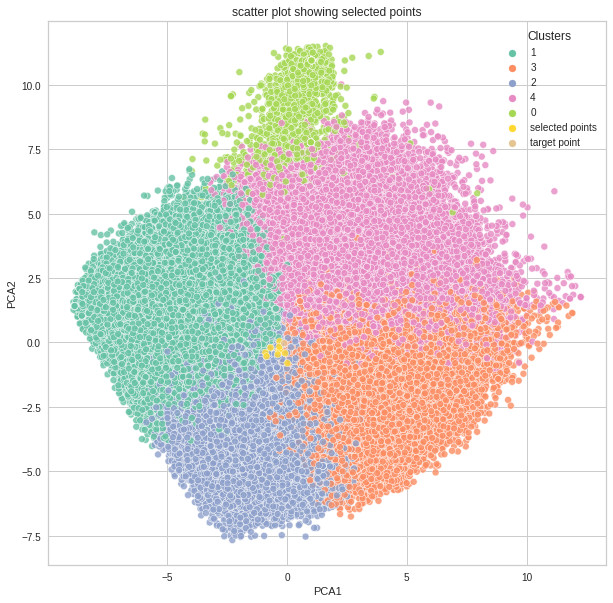

In [42]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca.append(sub_df_pca), x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)    #plotting both dataframes together
plt.title('scatter plot showing selected points');